In [1]:
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from munch import Munch

import sys, os
#ROOTPATH = os.path.abspath(os.path.join(os.path.dirname( __file__ ), '..'))
ROOTPATH = os.getcwd()
FILEPATH = ROOTPATH


#Default values, overridden if you pass in command line arguments
listfile_default = FILEPATH + "/data_bounds_all.dat" 
# outfile_default = FILEPATH + "/plots/PBH_bounds.png"
datadir =  FILEPATH + "/data" 

outfile = FILEPATH + "/plots/PBH_bounds.png"
outfile2 = FILEPATH + "/plots/PBH_bounds_summary.png"


# import matplotlib as mpl 
# #Specify the plot style
# mpl.rcParams.update({'font.size': 10,'font.family':'serif'})
# mpl.rcParams['xtick.major.size'] = 7
# mpl.rcParams['xtick.major.width'] = 1
# mpl.rcParams['xtick.minor.size'] = 3
# mpl.rcParams['xtick.minor.width'] = 1
# mpl.rcParams['ytick.major.size'] = 7
# mpl.rcParams['ytick.major.width'] = 1
# mpl.rcParams['ytick.minor.size'] = 3
# mpl.rcParams['ytick.minor.width'] = 1
# mpl.rcParams['xtick.direction'] = 'in'
# mpl.rcParams['ytick.direction'] = 'in'
# mpl.rcParams['lines.linewidth'] = 1.5
# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['ytick.right'] = True
# mpl.rcParams['font.family'] = 'serif'
# mpl.rc('text', usetex=True)
# mpl.rcParams['legend.edgecolor'] = 'inherit'
# from matplotlib import rc
# rc("font",**{'family':'sans-serif','sans-serif':['Helvetica']})

# from matplotlib import rc
# rc("text", usetex=False)

In [2]:
#Default values, overridden if you pass in command line arguments
listfile_default = FILEPATH + "/data_bounds_all.dat" 
# outfile_default = FILEPATH + "plots/PBH_bounds.png"
datadir =  FILEPATH + "/data/" 

outfile = FILEPATH + "/plots/PBH_bounds.png"
outfile2 = FILEPATH + "/plots/PBH_bounds_summary.png"

from params_bounds import *

listfile = None  # you can load a listfile here, if not read from params.

sel_files = np.loadtxt(listfile, dtype=str, unpack=True) if listfile else sel_files

print(f"listfile is  {listfile}")
print(f"selected data:   {sel_files}")

listfile is  None
selected data:   [['V_epm.txt', 'V $e^\\pm$', 'r', 1], ['EGgamma.txt', '$\\mathrm{EG} \\gamma$', 'g', 1], ['GC_ep.txt', 'GC $e^\\pm$', 'b', 1], ['HSC_cons.txt', 'HSC', 'b', 1], ['Kepler.txt', 'Kepler', 'gold', 2], ['EROS.txt', 'EROS', 'black', (1, 1, 2)], ['OGLE2024.txt', 'OGLE', 'gray', 1], ['ICARUS.txt', 'ICARUS', 'm', 1], ['SNe.txt', 'SNe', 'orange', 2], ['xray_ziparo22.txt', 'XRay bkg', 'orange', 1], ['PlanckSpherical.txt', 'CMB SPIK2', 'gray', 2], ['PlanckDisk.txt', 'CMB SPIK1', 'black', 1], ['GW.txt', 'GW (LVK)', 'brown', 2], ['CMB_Kamio_coll.txt', 'CMB AK1', 'r', 3], ['CMB_Kamio_photo.txt', 'CMB AK2', 'b', 3], ['CMB_Serpico_P.txt', 'CMB PSCCK', 'k', 3], ['cmb_FLC.txt', 'CMB FLC22', 'darkblue', 2], ['CMB_conservative.txt', 'CMB AEGSSM', 'darkblue', 2], ['SegueI.txt', 'Segue I', 'green', 2], ['EridanusII.txt', 'Eridanus II', 'm', 2], ['XRayB.txt', 'XRay binaries', 'orange', 3], ['LalphaForest.txt', 'Ly$\\alpha$', 'c', 2], ['DynamicalFriction.txt', 'Dyn. friction'

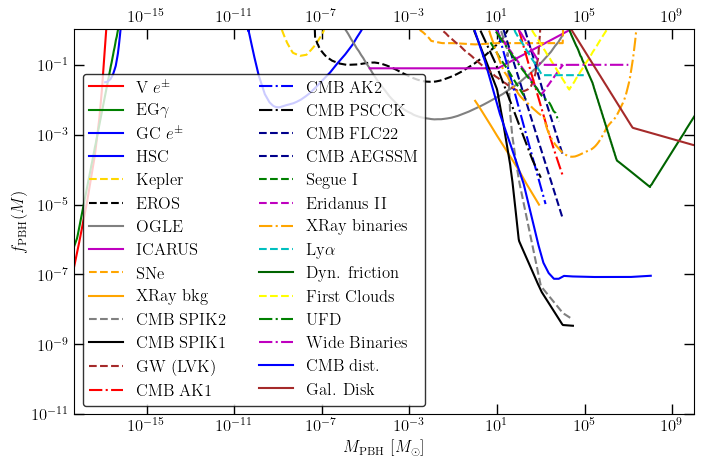

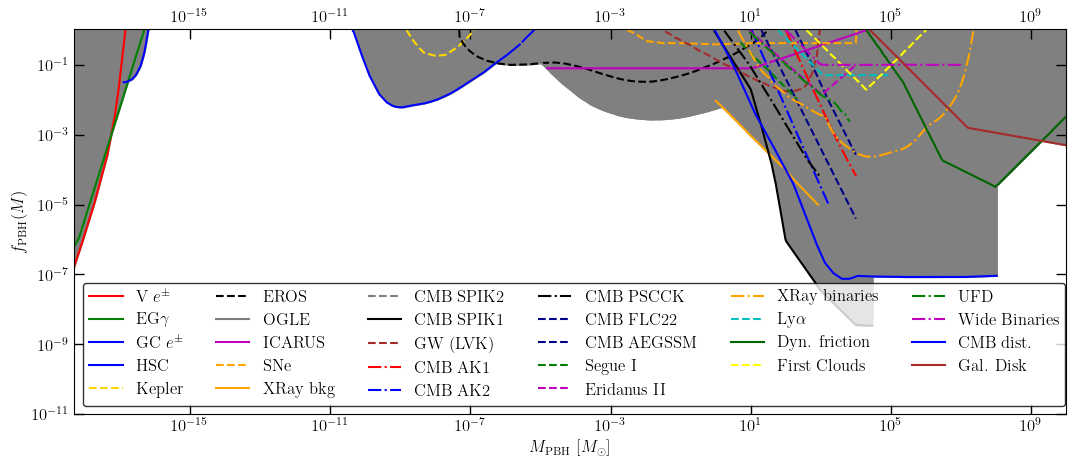

In [4]:
save_figs = True

fig, ax = plt.subplots(1,1, figsize=(8,5))
fig2, ax2 = plt.subplots(1,1, figsize=(12.8,5))

for bound in sel_files:

    f_bound = bound[0]
    lbl = bound[1]
    color = bound[2]
    order = bound[3]


    if order ==1:   ls = "-"
    if order ==2:   ls = "--"            
    if order ==3: ls = "-."
    
    errs = []
    # print(f"loading {f_bound}")

    try: 
        x, y = np.loadtxt( datadir + str(f_bound), unpack=True)

        # lbl = str(f_bound[:-4])
        # if color: 
        #     plt.plot(x,y,  label=lbl, color=color)
        # else:
        #     plt.plot(x,y,  label=lbl)

        asort = np.argsort(x)
        x,y = [x[asort], y[asort] ] 
        ax.plot(x,y,  label=lbl,  ls=ls, color=color)
        ax2.plot(x,y,  label=lbl, ls=ls, color=color)
        ax2.fill_between(x, y, y2=1, color="gray", interpolate=True) 
    
    except Exception as e:
        mess = f" !!!! dataset {f_bound} has been skipt >> Error:\n {e}"
        # errs.append[mess]
        print(mess)
    

for e in errs:
    print(e)



#Plotting stuff

# plt.axhspan(1, 1.5, facecolor='grey', alpha=0.5)

ax.legend(ncol=2)
ax2.legend(loc=3, ncol=6)

for axs in [ax, ax2]:   
    axs.set_ylim(1e-11, 1.05)
    axs.set_xlim(5e-19, 1e10)

    axs.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)    
    axs.set_xticks(np.logspace(-18, 4, 23), minor=True)
    axs.set_xticklabels([], minor=True)
        
    axs.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
    axs.set_ylabel(r'$f_\mathrm{PBH} (M)$')

    axs.set_xscale('log')
    axs.set_yscale('log')



if save_figs:

    fig.savefig(outfile, bbox_inches='tight', dpi=600)
    fig2.savefig(outfile2, bbox_inches='tight', dpi=600)
elif False:
    fig.show()
    fig2.show()
    
# fig.show()

    

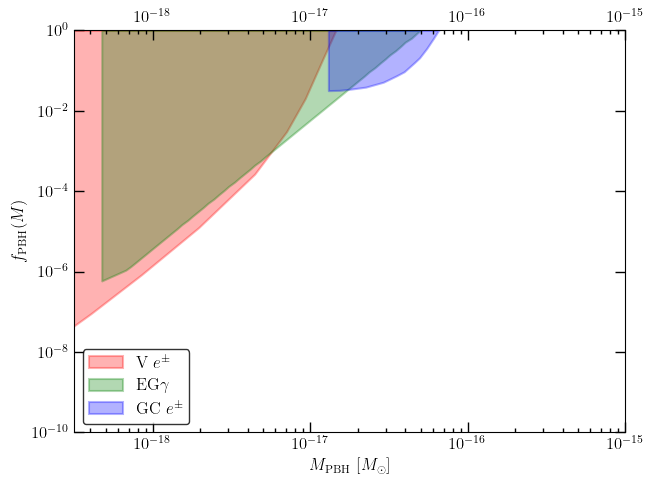

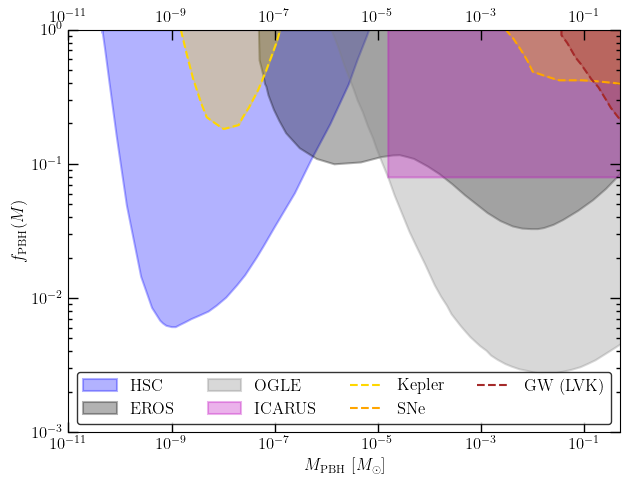

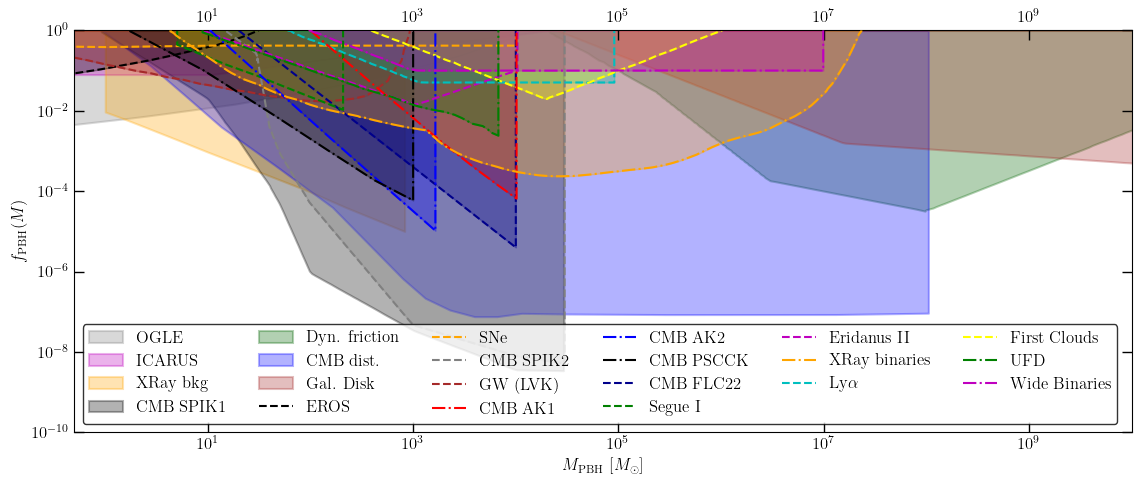

In [10]:
# save_figs = False


def partial_plot(ax, xlim=None, ylim=None, iplot=0):

    for s_order in [1,2]: 
        for bound in sel_files:
        
            f_bound = bound[0]
            lbl = bound[1]
            color = bound[2]
            order = bound[3]
            

            if isinstance(order,int):
                order = order
            elif isinstance(order, tuple):
                order = order[iplot]
            elif not order: order = 4

            if (s_order==1 and order>1):
                continue
            if (s_order==2 and order <2):
                continue
                

            if order ==1:   ls = "-"
            if order ==2:   ls = "--"            
            if order ==3: ls = "-."

            #print(order)
            
            errs = []

            if not color: color = None # "gray"

            try: 
                x, y = np.loadtxt(datadir + '/' + str(f_bound), unpack=True)
            except Exception as e:
                mess = f" !!!! dataset {f_bound} has been skipt >> Error:\n {e}"
                errs.append[mess]
                print(mess)

            # Selection & Sorting
            asort = np.argsort(x)
            x,y = [x[asort], y[asort] ] 
            x = np.hstack([x[0], x, x[-1]  ])
            y = np.hstack([[1], y, [1]  ])
            if isinstance(xlim, list):
                i1 = (x < xlim[1])
                i2 = (x > xlim[0])
                cond = i1 * i2
                if not cond.any(): 
                    continue


            # ax.plot(x,y, color=color)
            if order==1: 
                ax.fill_between(x, y, y2=1, color=color, alpha=0.3, \
                                label=lbl, lw=1.5, zorder=order ) 
                #ax.plot(x, y,  color=color,  alpha=1 ) 
            if order >1: 
                # if order>2: 
                #     ls = "--"
                # else: ls = "-"
                ax.fill_between(x, y, y2=1, color=color, alpha=0.3) 
                ax.plot(x, y,  color=color,  alpha=1, ls=ls, label=lbl,  zorder=order ) 


    for e in errs:
        print(e)

    # ax.legend(ncol=2)


    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)    
    ax.set_xticks(np.logspace(-18, 4, 23), minor=True)
    ax.set_xticklabels([], minor=True)

    ax.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
    ax.set_ylabel(r'$f_\mathrm{PBH} (M)$')

    ax.set_xscale('log')
    ax.set_yscale('log')

    for e in errs: 
        print(e)

    # ax.legend(ncol=2)
    ax.set_ylim(1e-10, 1.05)
    ax.set_xlim(5e-19, 1e8)
    
    if isinstance(xlim,list) :        
        ax.set_xlim(xlim[0], xlim[1])
    if isinstance(ylim,list):
        ax.set_ylim(ylim[0], ylim[1])

    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)    
    # ax.set_xticks(np.logspace(-18, 4, 23), minor=True)
    # ax.set_xticklabels([], minor=True)

    ax.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
    ax.set_ylabel(r'$f_\mathrm{PBH} (M)$')

    ax.set_xscale('log')
    ax.set_yscale('log')

    return ax 



fig, ax = plt.subplots(1,1, figsize=(6.7,5))
ax = partial_plot(ax, xlim=[10**-18.5, 1e-15])
ax.legend(loc=3, ncol=1)
fig.tight_layout()
fig.savefig("./plots/sub1_low_Mass.jpg", dpi=600)


fig, ax = plt.subplots(1,1, figsize=(6.7,5))
ax = partial_plot(ax, xlim=[1e-11, 0.5], ylim=[1e-3,1], iplot=1)
ax.legend(loc=3, ncol=4)
fig.tight_layout()
fig.savefig("./plots/sub2_Mid_Mass.jpg", dpi=600)


fig, ax = plt.subplots(1,1, figsize=(12.4,5))
ax = partial_plot(ax, xlim=[0.5, 10**10], iplot=2)
ax.legend(loc=3, ncol=6)
fig.tight_layout()
fig.savefig("./plots/sub3_High_Mass.jpg", dpi=600)


